Load 3 graphs:
- without column information -> G_org
- with column information by node degree >2 -> G_2
- with column information by node degree >1 -> G_1

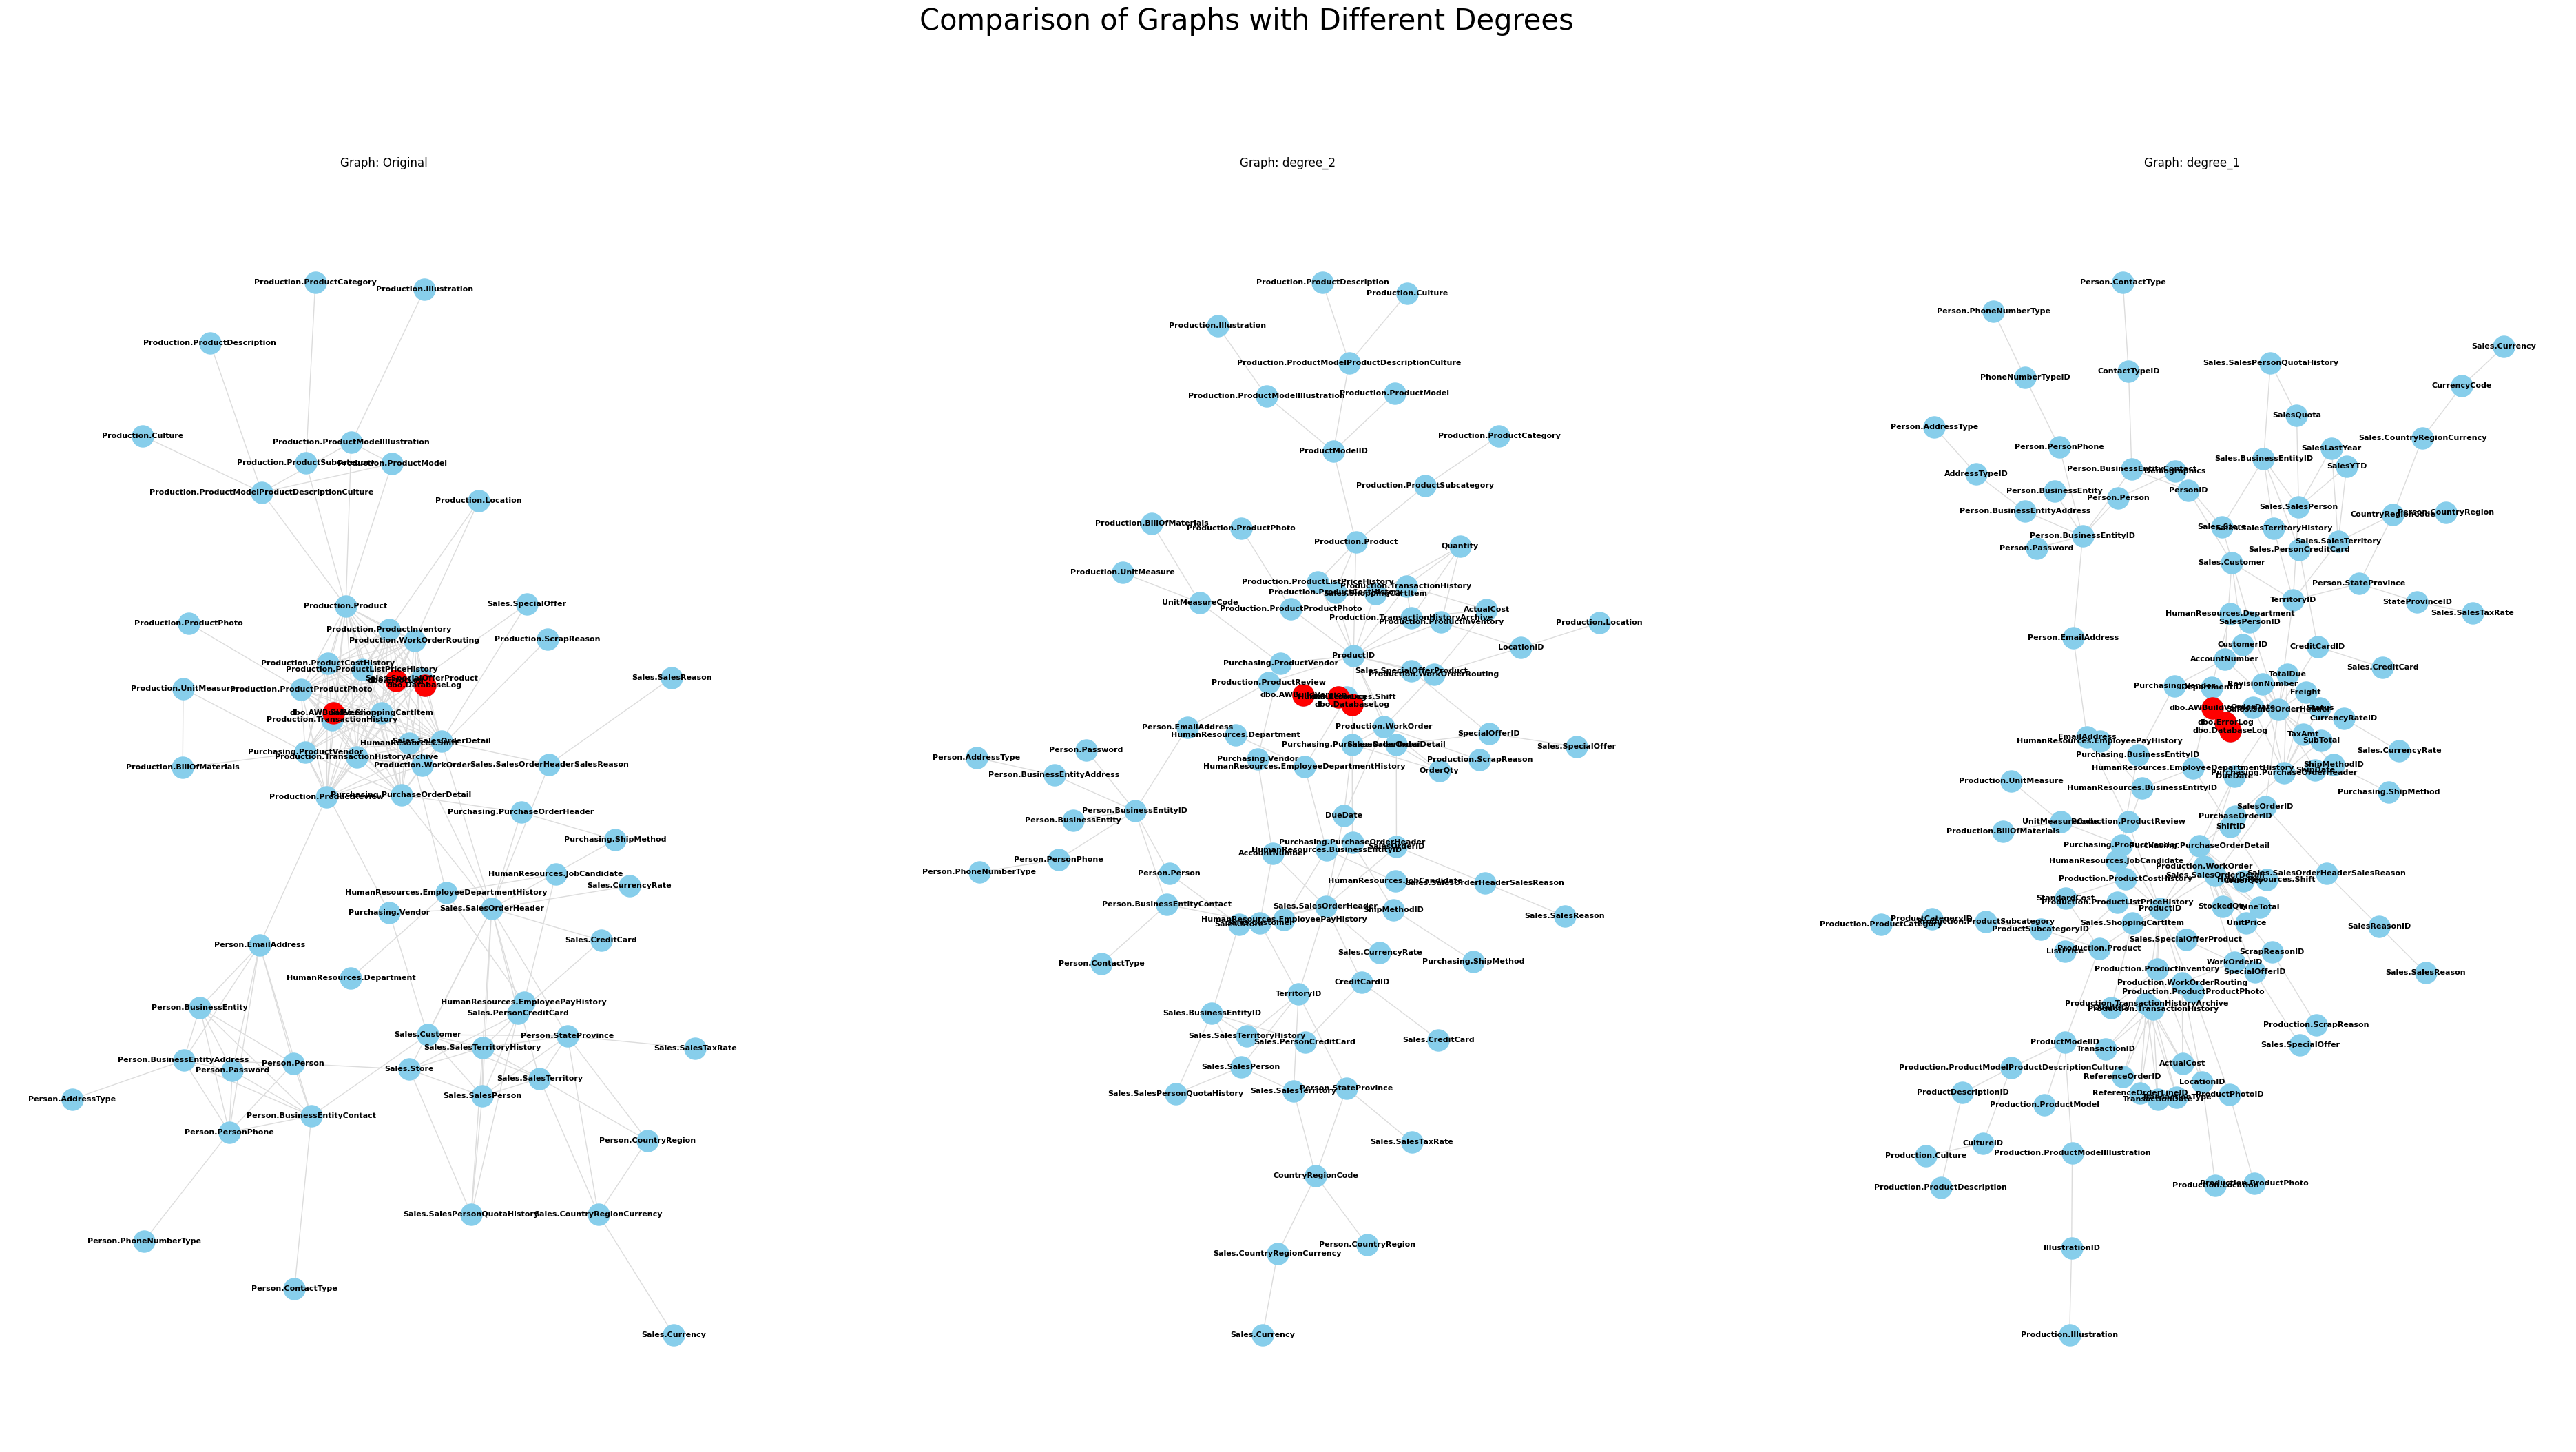

In [1]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt

with open(r'C:\Python\Python\AAA_UNI\MBD\Project\adw_graph_degree_none.pickle', 'rb') as f:
    G_org = pickle.load(f)
with open(r'C:\Python\Python\AAA_UNI\MBD\Project\adw_graph_degree_2.pickle', 'rb') as f:
    G_2 = pickle.load(f)
with open(r'C:\Python\Python\AAA_UNI\MBD\Project\adw_graph_degree_1.pickle', 'rb') as f:
    G_1 = pickle.load(f)

pos_org = nx.kamada_kawai_layout(G_org)
pos_2 = nx.kamada_kawai_layout(G_2)
pos_1 = nx.kamada_kawai_layout(G_1)

isolated_nodes_org = list(nx.isolates(G_org))
isolated_nodes_2 = list(nx.isolates(G_2))
isolated_nodes_1 = list(nx.isolates(G_1))

fig, axs = plt.subplots(1, 3, figsize=(48, 24))

axs[0].set_title("Graph: Original")
nx.draw(G_org, pos_org, edge_color="gainsboro", with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', ax=axs[0])
nx.draw_networkx_nodes(G_org, pos_org, nodelist=isolated_nodes_org, node_color='red', node_size=500, ax=axs[0])

axs[1].set_title("Graph: degree_2")
nx.draw(G_2, pos_2, edge_color="gainsboro", with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', ax=axs[1])
nx.draw_networkx_nodes(G_2, pos_2, nodelist=isolated_nodes_2, node_color='red', node_size=500, ax=axs[1])

axs[2].set_title("Graph: degree_1")
nx.draw(G_1, pos_1, edge_color="gainsboro", with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', ax=axs[2])
nx.draw_networkx_nodes(G_1, pos_1, nodelist=isolated_nodes_1, node_color='red', node_size=500, ax=axs[2])

plt.suptitle("Comparison of Graphs with Different Degrees", fontsize=30)
plt.show()


In [2]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.cluster import KMeans
import pandas as pd

c:\Users\tadas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


```markdown
### Random Walk Clustering Function

The next cell defines a function `random_walk_clustering` which performs clustering on a given graph using the Node2Vec algorithm to generate node embeddings and KMeans for clustering. The function takes the following parameters:
- `G`: The input graph.
- `num_clusters`: The number of clusters to form.
- `dimensions`: The number of dimensions for the node embeddings.
- `walk_length`: The length of each random walk.
- `num_walks`: The number of walks per node.
- `workers`: The number of worker threads to use.

The function returns the cluster labels for each node in the graph.
```

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from typing import List

def random_walk_clustering(G: nx.Graph,
                           num_clusters: int = 5, 
                           dimensions: int = 64,
                           walk_length: int = 10,
                           num_walks: int = 200,
                           workers: int = 10) -> List[int]:
    # Random walk 
    node2vec: Node2Vec = Node2Vec(G, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, workers=workers)
    model = node2vec.fit(window=5, min_count=1, batch_words=2)
    
    embeddings: List[List[float]] = [model.wv[str(node)] for node in G.nodes()]
    
    # KMeans
    kmeans: KMeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels: List[int] = kmeans.fit_predict(embeddings)

    # Gradient Boosting Classifier
    gbc: GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=5, max_depth=12, random_state=42)
    gbc.fit(embeddings, cluster_labels)
    
    cluster_labels = gbc.predict(embeddings)
    
    return cluster_labels

In [4]:
# Apply random walk clustering
num_clusters = 6
cluster_labels_org = random_walk_clustering(G_org, num_clusters=num_clusters)
cluster_labels_2 = random_walk_clustering(G_2, num_clusters=num_clusters)
cluster_labels_1 = random_walk_clustering(G_1, num_clusters=num_clusters)

Computing transition probabilities: 100%|██████████| 67/67 [00:00<00:00, 980.88it/s]
c:\Users\tadas\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tadas\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
Computing transition probabilities: 100%|██████████| 130/130 [00:00<00:00, 12941.39it/s]


### Random Walk Clustering Results

The next cell applies the `random_walk_clustering` function to the three graphs (`G_org`, `G_2`, and `G_1`) and stores the resulting cluster labels in `cluster_labels_org`, `cluster_labels_2`, and `cluster_labels_1` respectively. It then visualizes the clusters using the `visualize_clusters` function, which colors the nodes based on their cluster labels and displays the graphs side by side for comparison.

C:\Users\tadas\AppData\Local\Temp\ipykernel_23980\4217115994.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_clusters)
c:\Users\tadas\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


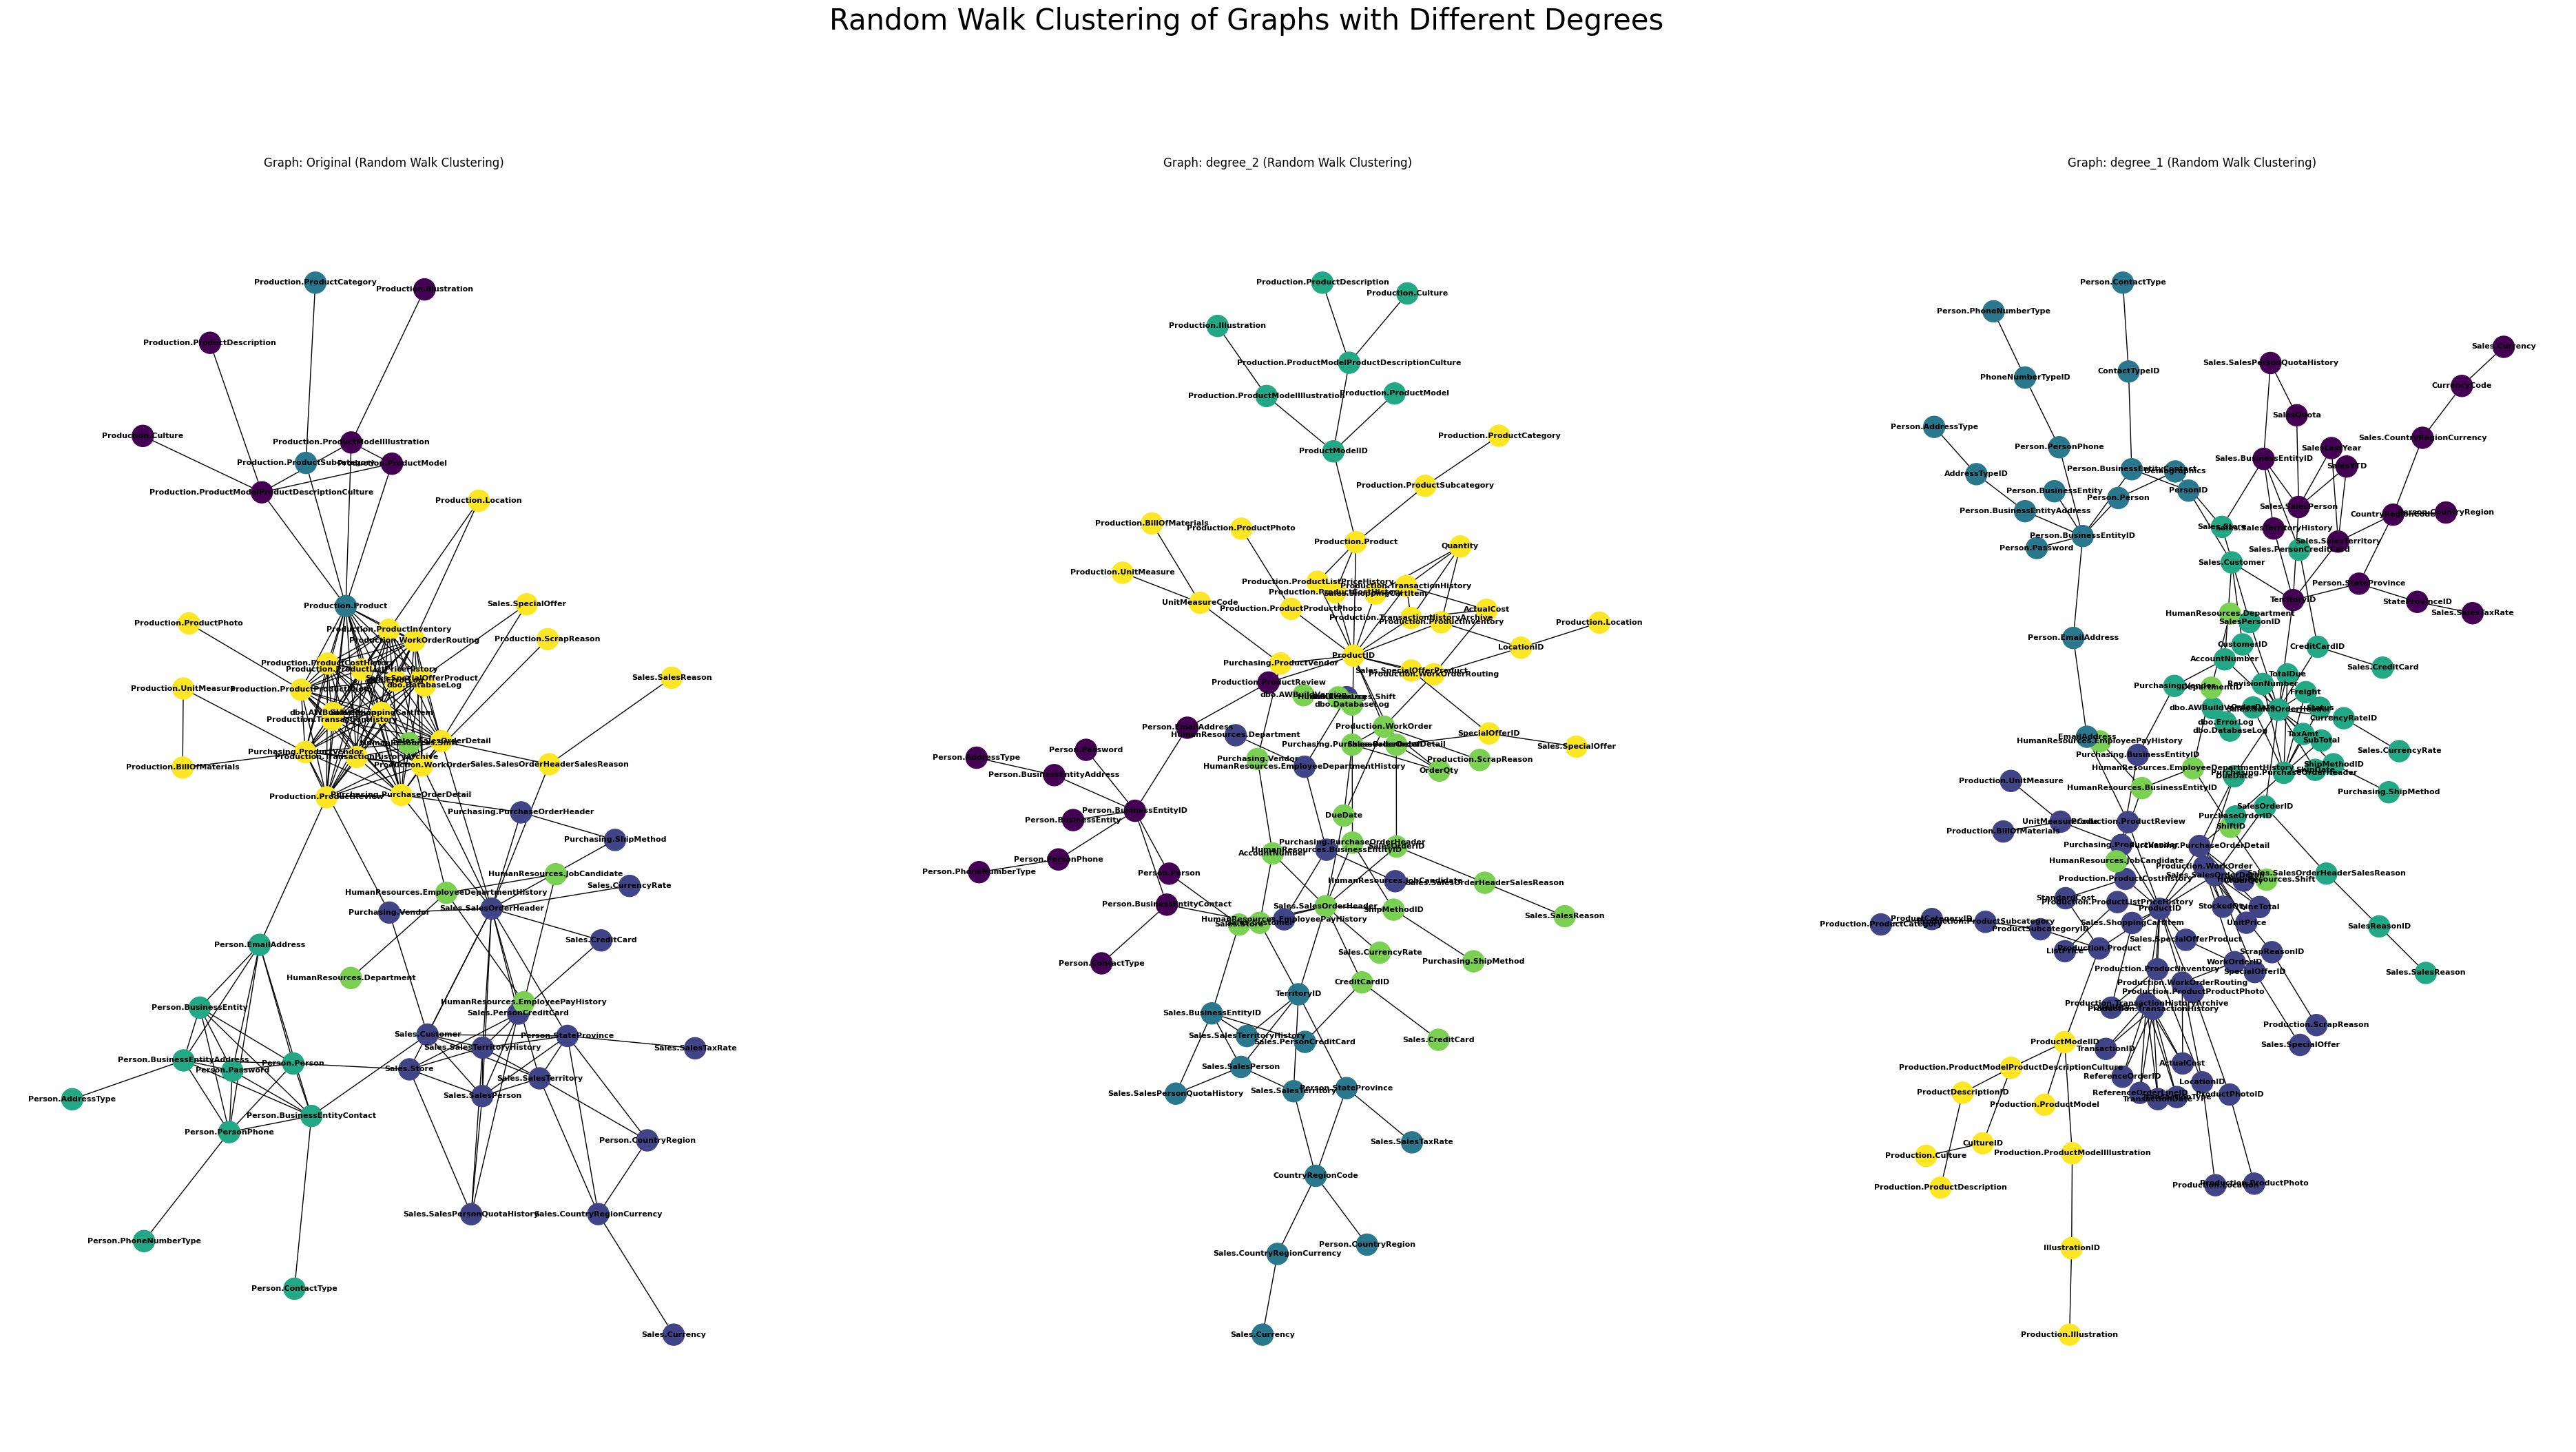

In [5]:
def visualize_clusters(G, cluster_labels, title, ax):
    pos = nx.kamada_kawai_layout(G)
    num_clusters = len(set(cluster_labels))
    cmap = plt.cm.get_cmap('viridis', num_clusters)
    node_colors = [cmap(label) for label in cluster_labels]
    
    nx.draw(G, pos=pos, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, node_size=500, font_size=8, font_weight='bold', ax=ax)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(48, 24))

visualize_clusters(G_org, cluster_labels_org, "Graph: Original (Random Walk Clustering)", axs[0])
visualize_clusters(G_2, cluster_labels_2, "Graph: degree_2 (Random Walk Clustering)", axs[1])
visualize_clusters(G_1, cluster_labels_1, "Graph: degree_1 (Random Walk Clustering)", axs[2])

plt.suptitle("Random Walk Clustering of Graphs with Different Degrees", fontsize=30)
plt.show()

In [6]:
def calculate_similarity(schema_df, cluster_df):
    schema_set = set(schema_df['table_name'])
    matching = sum(1 for label in cluster_df['node_label'] if label in schema_set)
    total_schema = len(schema_df)
    total_cluster = len(cluster_df)
    return matching, total_schema, total_cluster

In [7]:
def create_cluster_dataframe(G, cluster_labels):
    data = [{'cluster_label': cluster, 'node_label': node.split('.')[1] if '.' in node else node} for node, cluster in zip(G.nodes(), cluster_labels)]
    df = pd.DataFrame(data)
    return df

df_org = create_cluster_dataframe(G_org, cluster_labels_org)
df_2 = create_cluster_dataframe(G_2, cluster_labels_2)
df_1 = create_cluster_dataframe(G_1, cluster_labels_1)

In [8]:
import pandas as pd

# Load the table names DataFrame
table_names_df = pd.read_csv(r"C:\Python\Python\AAA_UNI\MBD\Project\gitlab\graph_analysis\tables_and_schemas")

def calculate_best_matches(subgraph_node_data):
    # Initialize variables to store results
    best_matches = {}
    best_similarity = {}
    match_ratio = {}

    # Iterate over each unique cluster in subgraph_node_data
    unique_clusters = subgraph_node_data['cluster_label'].unique()
    for cluster in unique_clusters:
        cluster_df = subgraph_node_data[subgraph_node_data['cluster_label'] == cluster]
        best_similarity[cluster] = 0.0
        best_matches[cluster] = None

        # Iterate over each schema in table_names_df
        unique_schemas = table_names_df['table_schema'].unique()

        for schema in unique_schemas:
            schema_df = table_names_df[table_names_df['table_schema'] == schema]

            # Calculate similarity between current cluster and current schema
            matching, total_schema, total_cluster = calculate_similarity(schema_df, cluster_df)

            # Calculate similarity percentage
            similarity_percentage = (matching / total_cluster) * 100

            # Update best match if current similarity is higher than previously recorded
            if similarity_percentage > best_similarity[cluster]:
                best_similarity[cluster] = similarity_percentage
                best_matches[cluster] = schema

            # Store match ratio
            match_ratio[(cluster, schema)] = f"{total_cluster}/{matching}"

    overall_average_similarity = 0
    # Output the best matches and their similarity percentages
    for cluster, schema in best_matches.items():
        if schema is not None:
            print(f"Best match for cluster {cluster+1} is schema '{schema}' with similarity {best_similarity[cluster]:.2f}% ({match_ratio[(cluster, schema)]})")
            overall_average_similarity += best_similarity[cluster]
    print(f'Overall Average similarity: {(overall_average_similarity/len(best_matches.items())):.2f}%')

# Apply the similarity calculation to each clustered graph
print("Original Graph Clustering:")
calculate_best_matches(df_org)

print("\nDegree > 2 Graph Clustering:")
calculate_best_matches(df_2)

print("\nDegree > 1 Graph Clustering:")
calculate_best_matches(df_1)

Original Graph Clustering:
Best match for cluster 2 is schema 'Sales' with similarity 72.22% (18/13)
Best match for cluster 4 is schema 'Person' with similarity 100.00% (10/10)
Best match for cluster 3 is schema 'Production' with similarity 100.00% (3/3)
Best match for cluster 6 is schema 'Production' with similarity 56.00% (25/14)
Best match for cluster 5 is schema 'HumanResources' with similarity 100.00% (5/5)
Best match for cluster 1 is schema 'Production' with similarity 100.00% (6/6)
Overall Average similarity: 88.04%

Degree > 2 Graph Clustering:
Best match for cluster 3 is schema 'Sales' with similarity 61.54% (13/8)
Best match for cluster 1 is schema 'Person' with similarity 83.33% (12/10)
Best match for cluster 6 is schema 'Production' with similarity 58.33% (24/14)
Best match for cluster 5 is schema 'Sales' with similarity 34.78% (23/8)
Best match for cluster 2 is schema 'HumanResources' with similarity 83.33% (6/5)
Best match for cluster 4 is schema 'Production' with similar